<a href="https://colab.research.google.com/github/yexf308/MAT592/blob/main/homework/HW4/Sp22HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4
## Homework guideline
- The deadline is Apr 21th 10:30am. Submission after the deadline will not be graded. 

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point. 

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to. 

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources but work on your own!

In [ ]:
%pylab inline 
import numpy.linalg as LA
from scipy.spatial.distance import cdist


## Set some default values of the the matplotlib plots
plt.rcParams['figure.figsize'] = (8.0, 8.0)  # Set default plot's sizes
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

Populating the interactive namespace from numpy and matplotlib


## Description
In this assignment, we will use the K-NN and LDA methods for face recognition. Our task here is to be able to predict the correct label (name of the person) given an image of his face.

We will use PCA for generating features for our classifiers.

For this task, we will use a dataset called [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/), which contains 13233 images of faces which belong to  5749 people. Each image in the dataset is labeled with a number corresponding to a person's name. All the images in the dataset are cropped and resized to the same image size.

To load the data, we will use the scikit-learn's function [sklearn.datasets.fetch_lfw_people](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html). To make our life a bit easier we will only use faces of people which appear in the dataset more than 100 times.

Number of images in the dataset: 1140
Number of different persons in the dataset: 5
Each images size is: (62, 47)


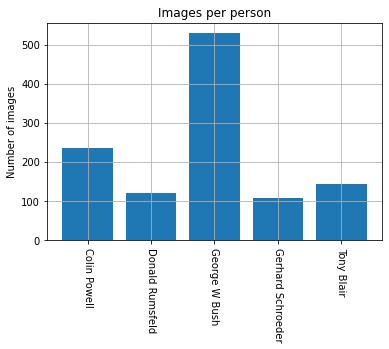

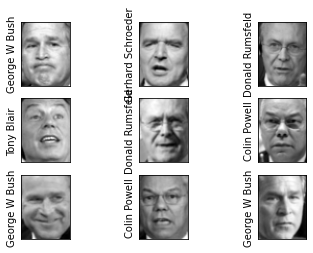

In [ ]:
from sklearn.datasets import fetch_lfw_people
dataset = fetch_lfw_people(min_faces_per_person=100)

X = dataset.images
y = dataset.target
label_to_name_mapping = dataset.target_names
image_shape = X[0].shape

print('Number of images in the dataset: {}'.format(len(X)))
print('Number of different persons in the dataset: {}'.format(len(np.unique(y))))
print('Each images size is: {}'.format(image_shape))

_, images_per_class = np.unique(y, return_counts=True)
fig, ax = plt.subplots()
ax.bar(label_to_name_mapping, images_per_class)
ax.set_xticklabels(label_to_name_mapping, rotation=-90);
ax.set_title('Images per person')
ax.set_ylabel('Number of images')


# plots the first 20 images in the dataset. 
fig, ax_array = plt.subplots(3, 3)
for i, ax in enumerate(ax_array.flat):
    ax.imshow(X[i], cmap='gray')
    ax.set_ylabel(label_to_name_mapping[y[i]])
    ax.set_yticks([])
    ax.set_xticks([])

In [ ]:
from sklearn.model_selection import train_test_split
# split the data into 80% training set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(912, 62, 47)
(228, 62, 47)




---


# Q1: PCA (40pt)
Instead of working directly with the pixels as our input, we would like to select a smaller number of features to use as an input to our classifier.

We will use PCA to represent a given image using a smaller number of variables. 

We can also think of this task as trying to compress the image representation.

Currently, each image is represented using 2914 numbers (47 x 62 pixels). Let us try to reduce this number using PCA. This, of course, will come at the cost of not being able to reconstruct the image exactly, but only approximately.



---


### Q1.1: Prepare data
In order to use PCA on the images need to store each image as a vector. We will reshape each image to be a 1d vector of size 2914 x 1.


In [ ]:
#@title  Q1.1 
# your code starts here



---


### Q1.2 Eigenface
Apply the principle component analysis on the dataset and **plot the singular values**. Each eigenvector has the same dimensionality as the original images, and thus can itself be seen as an image. These principle components (after reshaping into  $47\times 62$ pixels) are therefore called **Eigenfaces**. Please plot the first nine eigenfaces which corresponding the top nine singular values. 

In [ ]:
#@title  Q1.2 
# your code starts here



---


### Q1.3 Reconstruction images 
Use one random chosen image as the test, please plot the reconstructed image and error as a function of the number of principle components. You could tell it is reasonable to choose 300 principle components here. 

Then please use top 300 principle components (Eigenfaces) to reconstruct all images. This compress the whole dataset at once. Pick any image after the compression and visualize it. Show the effect of PCA by comparing the original image and the PCA images side by side using subplot. 

In [ ]:
#@title  Q1.3
# your code starts here



---


Now each image is 300 dimensional instead of 2914 dimensional, without losing lots of information. You can apply all sorts of ML algorithm (classification and clustering) on this 300 dimensional array. This will significantly speed up your learning.
# Q2: 1-NN classification (30pt)

Try to classify the images in the testing set using 1-nearest neighbor (1-NN) of the training set. Please calculate the misclassification rate. 



In [ ]:
#@title  Q2
# your code starts here

# Q3: Linear discrimination analysis (LDA) (30pt)
### Q3.1 Learning
Calculate the model's parameters using MLE.
Reminder, LDA's model parameters are:
- The mean values for each class $\mu_c$
- The covariance matrix for all classes $\Sigma$.
- The prior distribution of each class.

In [ ]:
#@title  Q3.1
# your code starts here

### Q3.2 Classication
Use the estimated parameters to build our classifier. Please calculate the misclassification rate. Could you plot serveral pictures that LDA misclassified. 

In [ ]:
#@title  Q3.2
# your code starts here

# Q4(Optional): Fisher's Linear Discriminant

Implement FLDA to classify these images for five classes. Note the code we used in the class will not work immediately since it was only for two classes. 

Please calculate the misclassification rate. Does FLDA perform better than LDA? 

In [ ]:
#@title  Q4(optional)
# your code starts here